In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/commute-time (combined).csv')

In [3]:
df.shape

(1107, 9)

In [4]:
df.head()

,Timestamp,Age,Gender,Major,Distance,Mode,Traffic,Time,Column 1
0,12/13/2024 14:11:16,25,Male,CSE,11.0,Bus,High,200.0,NaN
1,12/13/2024 14:23:25,25,Male,CSE,2.0,Walk,Low,20.0,NaN
2,12/13/2024 14:24:31,25,Male,CSE,4.0,Bus,Medium,120.0,NaN
3,12/13/2024 14:26:48,24,Female,CSE,4.3,Bus,High,120.0,NaN
4,12/13/2024 14:27:28,25,Male,CSE,6.0,Bus,Medium,65.0,NaN


In [5]:
df.drop('Timestamp', axis=1, inplace=True)
df.drop('Column 1', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1107 non-null   int64  
 1   Gender    1107 non-null   object 
 2   Major     1106 non-null   object 
 3   Distance  1107 non-null   float64
 4   Mode      1098 non-null   object 
 5   Traffic   1106 non-null   object 
 6   Time      1105 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.7+ KB


In [7]:
df['Gender'].value_counts()

Gender
Male      647
Female    430
Other      30
Name: count, dtype: int64

In [8]:
# df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == '0' else ('Female' if x == '1' else x))

In [9]:
df['Gender'].value_counts()

Gender
Male      647
Female    430
Other      30
Name: count, dtype: int64

In [10]:
df['Major'].value_counts()

Major
CSE                    563
EEE                    215
Business                86
Engineering             84
Computer Science        35
Arts                    21
Biology                 19
CE                      17
Mathematics             11
Law                      7
BBA                      7
English                  5
BSAg                     5
ME                       3
GE                       2
Education                2
IT                       2
MBBS                     2
Agriculture              2
Economics                2
IPE                      2
CS                       1
Bss                      1
Other                    1
BA                       1
Bsag                     1
Ag                       1
Social Work              1
Physics                  1
BSAg                     1
Agriculture              1
Agricultural             1
Chemistry                1
 URP                     1
nuclear engineering      1
Name: count, dtype: int64

*Standardizing the Names*

In [11]:
df.loc[df['Major'].isin(['CSE', 'CS', 'Computer Science']), 'Major'] = 'Computer Science'
df.loc[df['Major'].isin(['CE']), 'Major'] = 'Civil Engineering'
df.loc[df['Major'].isin(['ME']), 'Major'] = 'Mechanical Engineering'
df.loc[df['Major'].isin(['BBA', 'Business']), 'Major'] = 'Business Administration'
df.loc[df['Major'].isin(['BSAg', 'Bsag', 'Ag', 'Agriculture', 'Agriculture ', 'Agricultural', 'Agricultural ']), 'Major'] = 'Agriculture'
df.loc[df['Major'].isin(['nuclear engineering']), 'Major'] = 'Nuclear Engineering'
df.loc[df['Major'].isin(['Bss', 'Social Work']), 'Major'] = 'Social Science'
df.loc[df['Major'].isin(['BA', 'Arts']), 'Major'] = 'Arts'
df.loc[df['Major'].isin([' URP']), 'Major'] = 'URP'

In [12]:
df['Major'].value_counts()

Major
Computer Science           599
EEE                        215
Business Administration     93
Engineering                 84
Arts                        22
Biology                     19
Civil Engineering           17
Mathematics                 11
Agriculture                 11
Law                          7
English                      5
Mechanical Engineering       3
IT                           2
MBBS                         2
Economics                    2
Education                    2
Social Science               2
IPE                          2
GE                           2
Other                        1
BSAg                         1
Physics                      1
Chemistry                    1
URP                          1
Nuclear Engineering          1
Name: count, dtype: int64

In [13]:
df.head()

,Age,Gender,Major,Distance,Mode,Traffic,Time
0,25,Male,Computer Science,11.0,Bus,High,200.0
1,25,Male,Computer Science,2.0,Walk,Low,20.0
2,25,Male,Computer Science,4.0,Bus,Medium,120.0
3,24,Female,Computer Science,4.3,Bus,High,120.0
4,25,Male,Computer Science,6.0,Bus,Medium,65.0


In [14]:
df.isnull().sum()

Age         0
Gender      0
Major       1
Distance    0
Mode        9
Traffic     1
Time        2
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(50)

In [16]:
# Standardizing transportation modes
df.loc[df['Mode'].str.lower().isin(['rickshaw', 'rickshaw ','riskha', 'auto rickshaw', 'autorickshaw', 'autorickshaw ',
                                    'auto-rickshaw', 'autoricshaw', 'autorickshaws', 'autorickshaws ', 'rickshaw', 'Autorickshaws']), 'Mode'] = 'Rickshaw'

df.loc[df['Mode'].str.lower().isin(['walking', 'walk', 'on foot', 'by foot', 'by walk', 
                                    'from resident hall', 'walk and bus', 'on foot']), 'Mode'] = 'Walk'

df.loc[df['Mode'].str.lower().isin(['cycle', 'bicycle', 'bike', 'e motor', 'bicycle']), 'Mode'] = 'Bike'

df.loc[df['Mode'].str.lower().isin(['bus', 'bus & auto']), 'Mode'] = 'Bus'

df.loc[df['Mode'].str.lower().isin(['car']), 'Mode'] = 'Car'
df.loc[df['Mode'].str.lower().isin(['cycle ', 'bicycle ']), 'Mode'] = 'Bicycle'


In [17]:
index = df[(df.Mode == '???')].index
index1 =  df[( df.Mode == '?????? ')].index
df.drop(index, inplace=True)
df.drop(index1, inplace=True)

In [18]:
df['Mode'].value_counts()

Mode
Bus         466
Walk        225
Car         223
Bike        138
Rickshaw     44
Bicycle       2
Name: count, dtype: int64

In [19]:
df['Traffic'].value_counts()

Traffic
Medium    384
Low       372
High      350
Name: count, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1107.0,25.725384,5.673175,18.0,23.0,25.0,27.0,60.0
Distance,1107.0,8.405935,7.796815,0.0,4.0,7.0,10.0,50.0
Time,1105.0,94.582081,77.106379,1.0,40.0,84.0,130.0,780.0


### Univariate Analysis

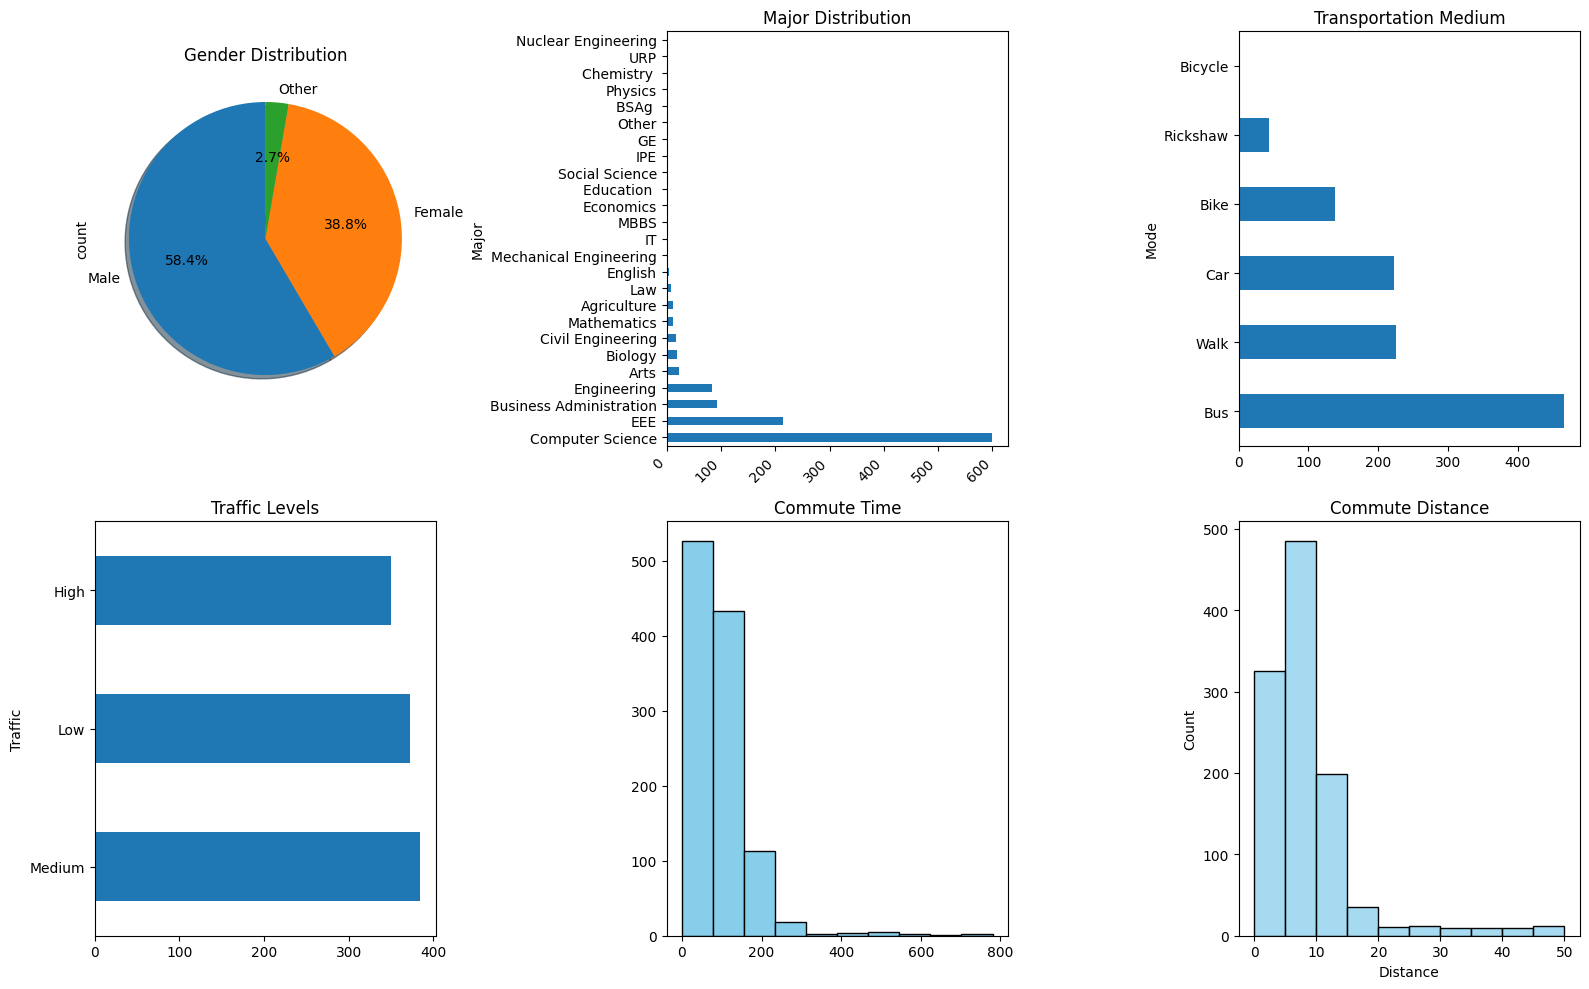

In [21]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
df['Major'].value_counts().plot(kind='barh')
plt.title('Major Distribution')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 3)
df['Mode'].value_counts().plot(kind='barh')
plt.title('Transportation Medium')

plt.subplot(2, 3, 4)
df['Traffic'].value_counts().plot(kind='barh')
plt.title('Traffic Levels')

plt.subplot(2, 3, 5)
plt.hist(df['Time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Commute Time')

plt.subplot(2, 3, 6)
sns.histplot(data=df,x='Distance', bins=10, color='skyblue', edgecolor='black')
plt.title('Commute Distance')

plt.tight_layout()
plt.show()

**Traffic vs Commute Time**

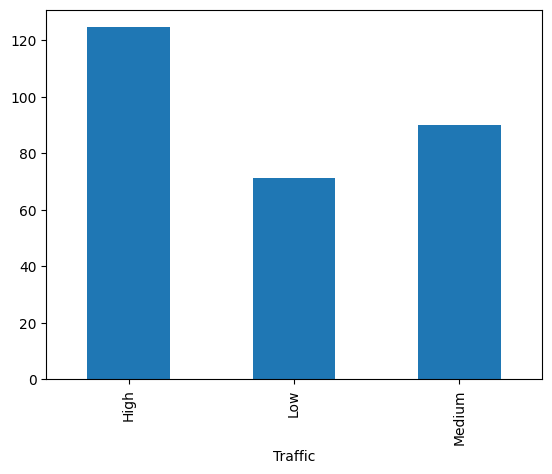

In [22]:
df.groupby('Traffic')['Time'].mean().plot(kind='bar')
plt.show()

*Insight: More traffic faced by employees corresponds to more time to commute to work*

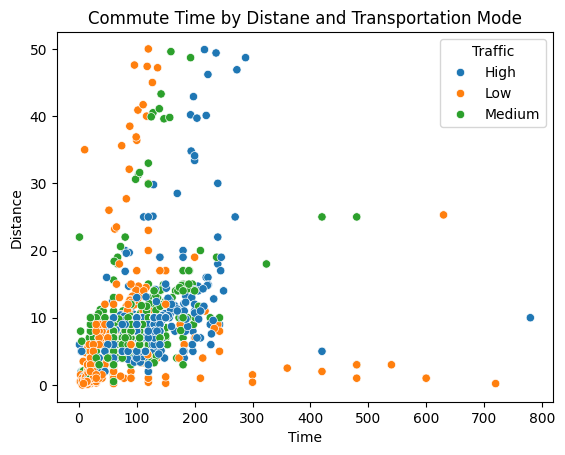

In [23]:
sns.scatterplot(x='Time', y='Distance', hue='Traffic', data=df)
plt.title("Commute Time by Distane and Transportation Mode")
plt.show()

*Insights: Ignoring anomalies, we can see a rough pattern that greater distances correspond to higher traffic as well as higher commute times.*

**Commute Mode (Transportation) vs Commute Time**

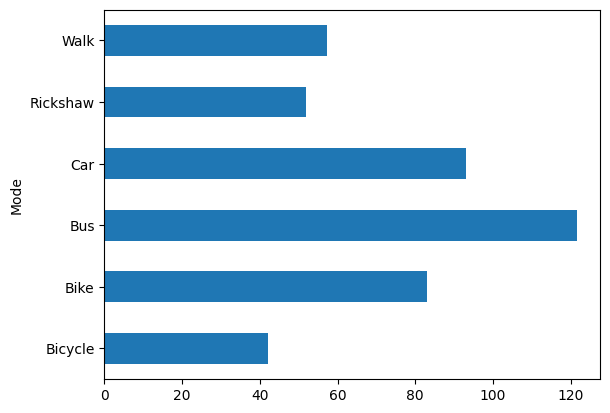

In [24]:
df.groupby('Mode')['Time'].mean().plot(kind='barh')
plt.show()

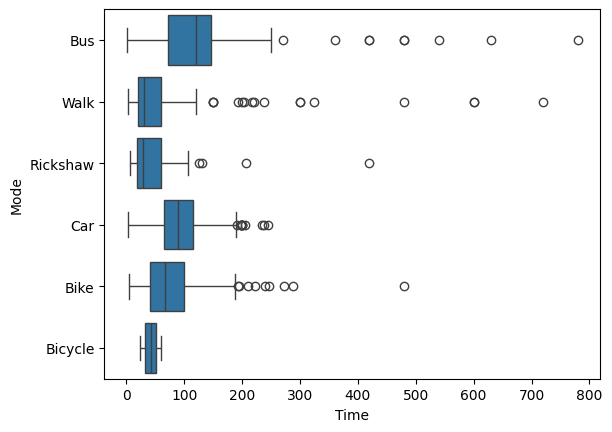

In [25]:
sns.boxplot(x='Time', y='Mode', data=df)
plt.show()

*Insight: The commute time varies between different modes of transportation.Typically, those who walk to work take very little time with the least variation, since they live close to their workplace. Little variation is also seen in commute times via bike and rickshaw, bikes taking more time likely due to greater distance. Those who travel by car take a wider range of times, median being less than bikes. Finally, bus takes the widest range of times, median time being the largest of all transports.*

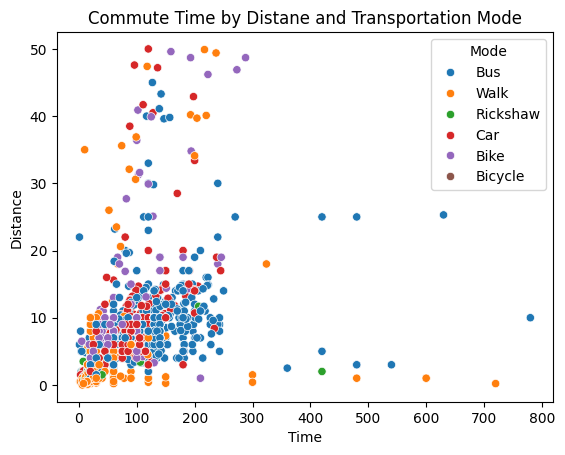

In [26]:
sns.scatterplot(x='Time', y='Distance', hue='Mode', data=df)
plt.title("Commute Time by Distane and Transportation Mode")
plt.show()

Positive Correlation between distance and commute time. Also accross different transportations, we see the variance of bus is the most while that of bike is the least.

Heatmap

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1107 non-null   int64  
 1   Gender    1107 non-null   object 
 2   Major     1106 non-null   object 
 3   Distance  1107 non-null   float64
 4   Mode      1098 non-null   object 
 5   Traffic   1106 non-null   object 
 6   Time      1105 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.7+ KB


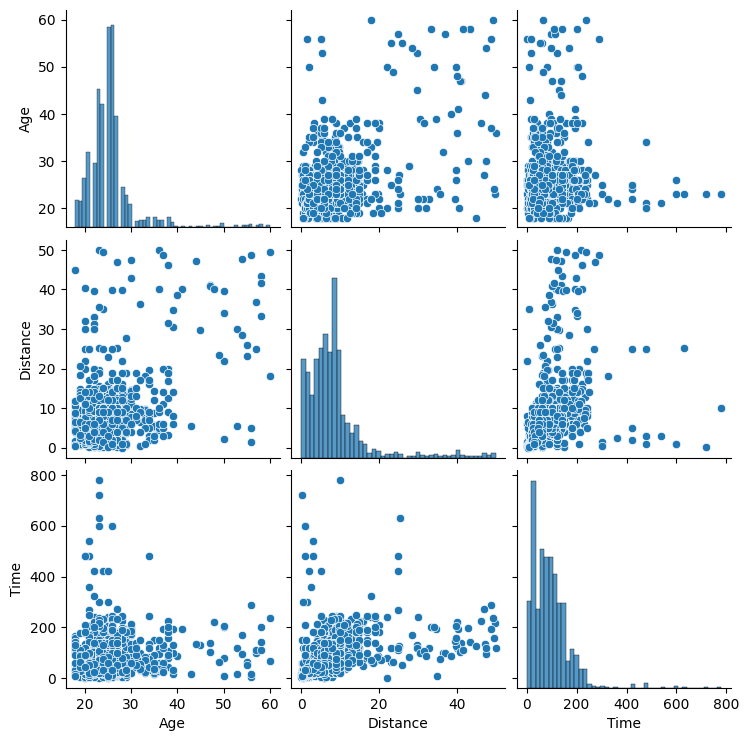

In [28]:
sns.pairplot(df, vars=df[['Age', 'Distance', 'Time']], kind='scatter', diag_kind='hist')
plt.show()

In [29]:
num_values = ['Age', 'Distance', 'Time']
correlation = df[num_values].corr()

In [30]:
correlation['Time']

Age         0.057420
Distance    0.341575
Time        1.000000
Name: Time, dtype: float64

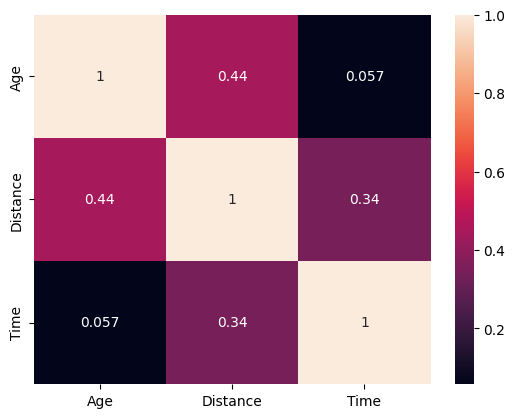

In [31]:
sns.heatmap(correlation, annot=True)
plt.show()

As expected, we see heavy positive correlation between commute distance and commute time.

### SUMMARY

The dataset contains employee workplace commute information. Most of the employees are male and major in CSE. They travel mostly by bus. While majority face low levels of traffic, numerous employees face dense traffic when commuting to and from work. Generally, greater distance, higher traffic result in higher commute times. The most common transport, bus, faces a wide range of commute times, averaging the highest among all other transport types.

# Regression Analysis

*Removing Missing Values and Duplicates*

In [32]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

*Saving Cleaned Dataset*

In [34]:
df.to_csv('cleaned_dataset/commute_time_cleaned.csv', index=False)

*Outlier Removal*

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1045 non-null   int64  
 1   Gender    1045 non-null   object 
 2   Major     1045 non-null   object 
 3   Distance  1045 non-null   float64
 4   Mode      1045 non-null   object 
 5   Traffic   1045 non-null   object 
 6   Time      1045 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 65.3+ KB


In [327]:
# remove numerical values using IQR method
def remove_outlier(column_name, df=df):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [328]:
df = remove_outlier('Age')
df = remove_outlier('Distance')
df = remove_outlier('Time')

In [329]:
valid_modes = df['Mode'].value_counts()[df['Mode'].value_counts() >= 5].index
df = df[df['Mode'].isin(valid_modes)]

In [330]:
valid_modes = df['Major'].value_counts()[df['Major'].value_counts() >= 5].index
df = df[df['Major'].isin(valid_modes)]

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1000 non-null   int64  
 1   Gender    1000 non-null   object 
 2   Major     1000 non-null   object 
 3   Distance  1000 non-null   float64
 4   Mode      1000 non-null   object 
 5   Traffic   1000 non-null   object 
 6   Time      1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 62.5+ KB


*One-hot-encoding the Categorical Features*

In [332]:
categorical_columns = ['Gender', 'Major', 'Mode']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [333]:
df_encode.head()

,Age,Distance,Traffic,Time,OHE_Male,OHE_Other,OHE_Arts,OHE_Biology,OHE_Business Administration,OHE_Civil Engineering,OHE_Computer Science,OHE_EEE,OHE_Engineering,OHE_English,OHE_Law,OHE_Mathematics,OHE_Bus,OHE_Car,OHE_Rickshaw,OHE_Walk
0,25,11.0,High,200.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,25,2.0,Low,20.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,25,4.0,Medium,120.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,24,4.3,High,120.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,25,6.0,Medium,65.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


*Ordinal/Label Encoding the Traffic Column*

In [334]:
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}

df_encode['Traffic'] = df['Traffic'].map(traffic_map)
df_encode.head()

,Age,Distance,Traffic,Time,OHE_Male,OHE_Other,OHE_Arts,OHE_Biology,OHE_Business Administration,OHE_Civil Engineering,OHE_Computer Science,OHE_EEE,OHE_Engineering,OHE_English,OHE_Law,OHE_Mathematics,OHE_Bus,OHE_Car,OHE_Rickshaw,OHE_Walk
0,25,11.0,2,200.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,25,2.0,0,20.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,25,4.0,1,120.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,24,4.3,2,120.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,25,6.0,1,65.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


*Features-Label Split*

In [335]:
df_encode.isnull().sum()

Age                            0
Distance                       0
Traffic                        0
Time                           0
OHE_Male                       0
OHE_Other                      0
OHE_Arts                       0
OHE_Biology                    0
OHE_Business Administration    0
OHE_Civil Engineering          0
OHE_Computer Science           0
OHE_EEE                        0
OHE_Engineering                0
OHE_English                    0
OHE_Law                        0
OHE_Mathematics                0
OHE_Bus                        0
OHE_Car                        0
OHE_Rickshaw                   0
OHE_Walk                       0
dtype: int64

In [336]:
df_encode.dropna(inplace=True)

In [337]:
df_encode.isnull().sum()

Age                            0
Distance                       0
Traffic                        0
Time                           0
OHE_Male                       0
OHE_Other                      0
OHE_Arts                       0
OHE_Biology                    0
OHE_Business Administration    0
OHE_Civil Engineering          0
OHE_Computer Science           0
OHE_EEE                        0
OHE_Engineering                0
OHE_English                    0
OHE_Law                        0
OHE_Mathematics                0
OHE_Bus                        0
OHE_Car                        0
OHE_Rickshaw                   0
OHE_Walk                       0
dtype: int64

In [338]:
X = df_encode.drop('Time', axis=1)
Y = df_encode['Time']

*Train-Test Split*

In [339]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

*Applying Linear Regression*

In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [341]:
def showMetrics(y_test, predictions):
    print("Evaluation Metrics-")
    print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, predictions))
    print("Root Mean Squared Error (RMSE): %.2f" % root_mean_squared_error(y_test, predictions))
    print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, predictions))
    print("R_2 Score: %.2f" % r2_score(y_test, predictions))

def showParameters(algo):
    features = X_train.columns
    coefficients = algo.coef_
    print("Feature----Coefficient")
    for feature, coef in zip(features, coefficients):
        print(f"{feature}: {coef}")

In [342]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
predictions
showParameters(lin_reg)
showMetrics(y_test, predictions)

Feature----Coefficient
Age: -0.7138142910029358
Distance: 3.872062786520601
Traffic: 20.353947104235466
OHE_Male: 1.985104442959034
OHE_Other: -26.40184059051879
OHE_Arts: -34.45975513718971
OHE_Biology: -63.01836483737064
OHE_Business Administration: -54.21618791562327
OHE_Civil Engineering: -23.256540871071774
OHE_Computer Science: -29.026231394205855
OHE_EEE: -26.343947694233698
OHE_Engineering: -47.13568149154637
OHE_English: -35.035285548389396
OHE_Law: -50.80021709368122
OHE_Mathematics: -49.12178801231186
OHE_Bus: 34.423906147955904
OHE_Car: 14.788475604054064
OHE_Rickshaw: -3.9465705843913117
OHE_Walk: -7.307901273079834
Evaluation Metrics-
Mean Squared Error (MSE): 1576.85
Root Mean Squared Error (RMSE): 39.71
Mean Absolute Error (MAE): 27.73
R_2 Score: 0.52


#### *Lasso Regression*

**Weak Regularization**

In [343]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_w = Lasso(alpha=0.01)

In [344]:
lasso_w.fit(X_train, y_train)
lasso_predictions = lasso_w.predict(X_test)
showParameters(lin_reg)
showMetrics(y_test, lasso_predictions)

Feature----Coefficient
Age: -0.7138142910029358
Distance: 3.872062786520601
Traffic: 20.353947104235466
OHE_Male: 1.985104442959034
OHE_Other: -26.40184059051879
OHE_Arts: -34.45975513718971
OHE_Biology: -63.01836483737064
OHE_Business Administration: -54.21618791562327
OHE_Civil Engineering: -23.256540871071774
OHE_Computer Science: -29.026231394205855
OHE_EEE: -26.343947694233698
OHE_Engineering: -47.13568149154637
OHE_English: -35.035285548389396
OHE_Law: -50.80021709368122
OHE_Mathematics: -49.12178801231186
OHE_Bus: 34.423906147955904
OHE_Car: 14.788475604054064
OHE_Rickshaw: -3.9465705843913117
OHE_Walk: -7.307901273079834
Evaluation Metrics-
Mean Squared Error (MSE): 1582.33
Root Mean Squared Error (RMSE): 39.78
Mean Absolute Error (MAE): 27.83
R_2 Score: 0.51


With low value of alpha or regularization strength, none of the coefficients shrink to zero.

**Moderate Regularization Strength**

In [345]:
lasso_m = Lasso(0.1)
lasso_m.fit(X_train, y_train)
lasso_predictions = lasso_m.predict(X_test)
showParameters(lasso_m)
showMetrics(y_test, lasso_predictions)

Feature----Coefficient
Age: -0.9179384603762331
Distance: 3.8770563315969127
Traffic: 20.138530925738223
OHE_Male: 1.568049394079588
OHE_Other: -26.33250283458867
OHE_Arts: -0.0
OHE_Biology: -25.022519051516888
OHE_Business Administration: -22.29260471178756
OHE_Civil Engineering: 0.0
OHE_Computer Science: 1.4259441124327352
OHE_EEE: 3.9785792929251547
OHE_Engineering: -14.8425029803097
OHE_English: -0.0
OHE_Law: -5.502336621722664
OHE_Mathematics: -5.073195966545442
OHE_Bus: 34.67853850356335
OHE_Car: 13.745597983737579
OHE_Rickshaw: -2.1794630422882424
OHE_Walk: -6.20145908733017
Evaluation Metrics-
Mean Squared Error (MSE): 1618.26
Root Mean Squared Error (RMSE): 40.23
Mean Absolute Error (MAE): 28.23
R_2 Score: 0.50


In [346]:
lasso_m = Lasso(0.5)
lasso_m.fit(X_train, y_train)
lasso_predictions = lasso_m.predict(X_test)
showParameters(lasso_m)
showMetrics(y_test, lasso_predictions)

Feature----Coefficient
Age: -1.041617924595833
Distance: 3.710749868348713
Traffic: 20.207860373054356
OHE_Male: 0.8316280350869183
OHE_Other: -16.62792059076678
OHE_Arts: 0.0
OHE_Biology: -0.0
OHE_Business Administration: -9.995414432302429
OHE_Civil Engineering: 0.0
OHE_Computer Science: 7.861139910051811
OHE_EEE: 9.904612432620508
OHE_Engineering: -2.470502824735303
OHE_English: 0.0
OHE_Law: -0.0
OHE_Mathematics: -0.0
OHE_Bus: 32.43305766641189
OHE_Car: 9.49726262183873
OHE_Rickshaw: -0.0
OHE_Walk: -5.8481872609556635
Evaluation Metrics-
Mean Squared Error (MSE): 1666.47
Root Mean Squared Error (RMSE): 40.82
Mean Absolute Error (MAE): 29.17
R_2 Score: 0.49



The coefficients of features OHE_Rickshaw and OHE_CSE have shrunk to zero. This implies these features are less relevant to or less predictive of the label outputs


**High Regularization**

In [347]:
lasso_h = Lasso(alpha=1)

lasso_h.fit(X_train, y_train)
lasso_predictions = lasso_h.predict(X_test)
showParameters(lasso_h)
showMetrics(y_test, lasso_predictions)

Feature----Coefficient
Age: -1.1483742354351318
Distance: 3.5760383612228512
Traffic: 19.96105492696393
OHE_Male: 0.0
OHE_Other: -0.0
OHE_Arts: 0.0
OHE_Biology: -0.0
OHE_Business Administration: -4.827339382018205
OHE_Civil Engineering: 0.0
OHE_Computer Science: 6.271049587268293
OHE_EEE: 7.528399342804511
OHE_Engineering: -0.0
OHE_English: 0.0
OHE_Law: -0.0
OHE_Mathematics: -0.0
OHE_Bus: 28.589549132987848
OHE_Car: 3.8249289213121926
OHE_Rickshaw: -0.0
OHE_Walk: -6.593159537216817
Evaluation Metrics-
Mean Squared Error (MSE): 1739.72
Root Mean Squared Error (RMSE): 41.71
Mean Absolute Error (MAE): 30.52
R_2 Score: 0.47


Another coefficient corresponding to OHE_Walk has shrunk to zero

In [348]:
lasso_h = Lasso(alpha=10)

lasso_h.fit(X_train, y_train)
lasso_predictions = lasso_h.predict(X_test)
showParameters(lasso_h)
showMetrics(y_test, lasso_predictions)

Feature----Coefficient
Age: -1.0019057569519028
Distance: 3.5377442430523804
Traffic: 10.191336654394275
OHE_Male: -0.0
OHE_Other: -0.0
OHE_Arts: -0.0
OHE_Biology: -0.0
OHE_Business Administration: -0.0
OHE_Civil Engineering: 0.0
OHE_Computer Science: 0.0
OHE_EEE: 0.0
OHE_Engineering: -0.0
OHE_English: 0.0
OHE_Law: -0.0
OHE_Mathematics: -0.0
OHE_Bus: 0.0
OHE_Car: -0.0
OHE_Rickshaw: -0.0
OHE_Walk: -0.0
Evaluation Metrics-
Mean Squared Error (MSE): 2326.39
Root Mean Squared Error (RMSE): 48.23
Mean Absolute Error (MAE): 38.98
R_2 Score: 0.29


All coefficients execept that of Commute distance have shrunk to zero, indicating that commute distance is the most predictive of the label commute time.


*Ridge Regression*

In [349]:
from sklearn.linear_model import Ridge
ridge_low = Ridge(alpha=0.01)

ridge_low.fit(X_train, y_train)
ridge_predictions = ridge_low.predict(X_test)
showParameters(ridge_low)
showMetrics(y_test, ridge_predictions)

Feature----Coefficient
Age: -0.7156933568010414
Distance: 3.8723448746769353
Traffic: 20.351850272923212
OHE_Male: 1.978106576190886
OHE_Other: -26.421800952263702
OHE_Arts: -33.907323687337524
OHE_Biology: -62.42935668994204
OHE_Business Administration: -53.682341258986284
OHE_Civil Engineering: -22.713991918967498
OHE_Computer Science: -28.500814013878628
OHE_EEE: -25.8174467891569
OHE_Engineering: -46.59962629028069
OHE_English: -34.39218421589918
OHE_Law: -50.18161482556488
OHE_Mathematics: -48.500412809640586
OHE_Bus: 34.42823899162545
OHE_Car: 14.783293834337224
OHE_Rickshaw: -3.9485284326522216
OHE_Walk: -7.294377819886162
Evaluation Metrics-
Mean Squared Error (MSE): 1577.11
Root Mean Squared Error (RMSE): 39.71
Mean Absolute Error (MAE): 27.74
R_2 Score: 0.52


In [350]:
ridge_medium = Ridge(alpha=0.5)
ridge_medium.fit(X_train, y_train)
ridge_predictions = ridge_medium.predict(X_test)
showParameters(ridge_medium)
showMetrics(y_test, ridge_predictions)

Feature----Coefficient
Age: -0.7737141287735442
Distance: 3.8779597416691987
Traffic: 20.286661905298516
OHE_Male: 1.8090335648715397
OHE_Other: -26.760125727857027
OHE_Arts: -18.00547248494601
OHE_Biology: -45.214022715862576
OHE_Business Administration: -38.22933253809022
OHE_Civil Engineering: -7.409381713851722
OHE_Computer Science: -13.343749608571333
OHE_EEE: -10.632959822895389
OHE_Engineering: -31.09925654195729
OHE_English: -16.514891015691855
OHE_Law: -32.12513767660877
OHE_Mathematics: -30.483453553779114
OHE_Bus: 34.444834694214286
OHE_Car: 14.509029971188566
OHE_Rickshaw: -4.104013719730559
OHE_Walk: -7.012876857681008
Evaluation Metrics-
Mean Squared Error (MSE): 1587.40
Root Mean Squared Error (RMSE): 39.84
Mean Absolute Error (MAE): 27.88
R_2 Score: 0.51


MSE and RMSE significantly lower than base LR and Lasso Regression

In [362]:
ridge_high = Ridge(alpha=5)

In [363]:
ridge_high.fit(X_train, y_train)
ridge_predictions = ridge_high.predict(X_test)
showParameters(ridge_high)
showMetrics(y_test, ridge_predictions)

Feature----Coefficient
Age: -0.8935683840421944
Distance: 3.8451936907477164
Traffic: 20.12574395382336
OHE_Male: 2.0370457228349195
OHE_Other: -23.303646870627432
OHE_Arts: 0.06907832905653757
OHE_Biology: -21.698813863518573
OHE_Business Administration: -19.05479483747462
OHE_Civil Engineering: 6.254054839050344
OHE_Computer Science: 4.561589787550967
OHE_EEE: 7.230471496464616
OHE_Engineering: -12.210579412190157
OHE_English: -0.4758614421279125
OHE_Law: -8.774514508631786
OHE_Mathematics: -8.359058583994807
OHE_Bus: 32.7922684806626
OHE_Car: 12.321200264791802
OHE_Rickshaw: -5.4520103188816424
OHE_Walk: -8.175250329672332
Evaluation Metrics-
Mean Squared Error (MSE): 1613.61
Root Mean Squared Error (RMSE): 40.17
Mean Absolute Error (MAE): 28.19
R_2 Score: 0.50


**Polynomial Regression**

In [353]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2

In [354]:
poly2 = PolynomialFeatures(2)

X_poly = poly2.fit_transform(X)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly,Y,test_size=0.2,random_state=23)
poly2.fit(X_poly_train, y_poly_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_train, y_poly_train)

LinearRegression()

In [355]:
poly2_predictions = lin_reg2.predict(X_poly_test)

In [356]:
showParameters(lin_reg2)
showMetrics(y_poly_test, poly2_predictions)

Feature----Coefficient
Age: -6.6260696629649054e-09
Distance: 6.44210493363594
Traffic: 1.9533619266652125
OHE_Male: 25.589624366972494
OHE_Other: -22.53232553775269
OHE_Arts: -42.29708777139883
OHE_Biology: -22.931873225959425
OHE_Business Administration: 18.912772477074263
OHE_Civil Engineering: 12.29699377690855
OHE_Computer Science: -221.6197660305006
OHE_EEE: 28.144120687276217
OHE_Engineering: 3.2824877412033913
OHE_English: 18.411409199391382
OHE_Law: -2.441917054667776
OHE_Mathematics: -7.0273453872774825
OHE_Bus: -71.95485003377317
OHE_Car: 34.98437822408861
OHE_Rickshaw: 5.165829103058903
OHE_Walk: 16.317185598693094
Evaluation Metrics-
Mean Squared Error (MSE): 1734.07
Root Mean Squared Error (RMSE): 41.64
Mean Absolute Error (MAE): 28.61
R_2 Score: 0.47


Due to polynomial features, the model is overfitting - performance on test set is worse.

degree = 3

In [357]:
poly3 = PolynomialFeatures(3)

X_poly = poly3.fit_transform(X)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly,Y,test_size=0.2,random_state=23)
poly3.fit(X_poly_train, y_poly_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_train, y_poly_train)

LinearRegression()

In [358]:
poly3_predictions = lin_reg2.predict(X_poly_test)

In [359]:
showParameters(lin_reg2)
showMetrics(y_poly_test, poly3_predictions)

Feature----Coefficient
Age: 7.463521661763787e-06
Distance: -141.48467670660446
Traffic: 0.6574301349814451
OHE_Male: -480.59529044625634
OHE_Other: 584.2647493454297
OHE_Arts: 1.2866275158455742
OHE_Biology: -0.8755253906251792
OHE_Business Administration: -5.781026869158446
OHE_Civil Engineering: -753.3781412739742
OHE_Computer Science: 1.8156944863223583
OHE_EEE: -586.1198290195434
OHE_Engineering: -777.0503970282934
OHE_English: 2139.1031231229845
OHE_Law: 0.04160582087118031
OHE_Mathematics: -0.021622907123240862
OHE_Bus: 0.7122471518779661
OHE_Car: -586.3820679442026
OHE_Rickshaw: -603.6390896063274
OHE_Walk: -104.59172616891271
Evaluation Metrics-
Mean Squared Error (MSE): 1535519.30
Root Mean Squared Error (RMSE): 1239.16
Mean Absolute Error (MAE): 264.59
R_2 Score: -470.40


still worse than linear regression. Higher degree polynomial regression result in further worse performance.


#### Summary

The regrssion analysis is done on the commute time dataset using 4 different regression models as follows:
* Linear regression
* Lasso regression
* Ridge regression
* Polynomial regression

At first I one-hot encoded the categorical features and label encoded the 'traffic' feature since there is ranking or hierarchy in this category (i.e. High, Medium, Low).

Then I did feature-lable split and train-test split maintaining 80-20 ratio.

* Based on the results of the regression analyses, we see that the *ridge regression model* performs the best with moderate regularization strength (i.e. alpha = 0.5). 
* Although the 3 regression models performed similarly, the lasso and ridge regularization allowed the model to eliminate irrelevant features, allowing the model to fit the training data well but not too well, so that it performs better on the test set. 
* Hence, the RMSE and MSE are lower and r^2 scores are better. For polynomial regression, the relationship between the input and output is not polynomial, so introducing higher-order terms degrade performance. 
* Most of the data has a random pattern, polynomial features don't really help capture the pattern better. The model captures the noise of the training data instead of finding a pattern - it overfits. 
* Infact, linear regression performs better in this case.